In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("train.csv")
testdata=pd.read_csv('test.csv')

In [3]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [122]:
data['Age'].fillna(data['Age'].median(), inplace=True)
testdata['Age'].fillna(data['Age'].median(), inplace=True)
data.tail()

,PassengerId,Sex,Pclass,Age,SibSp,Survived
886,887,1,2,27.0,0,0
887,888,0,1,19.0,0,1
888,889,0,3,28.0,1,0
889,890,1,1,26.0,0,1
890,891,1,3,32.0,0,0


In [123]:
data[data['Survived']==1]['Sex'].value_counts()


0    233
1    109
Name: Sex, dtype: int64

In [61]:
data[data['Survived']==0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

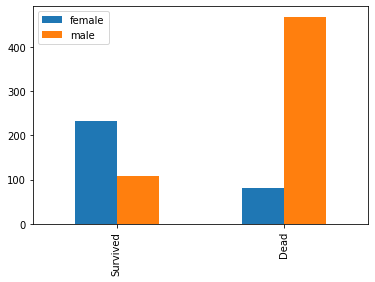

In [62]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df=pd.DataFrame([survived_sex,dead_sex])
df.index=['Survived','Dead']
df.plot(kind='bar')
plt.show()


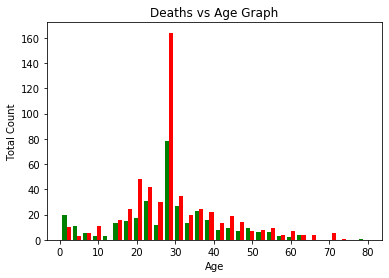

In [63]:
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']],color=['g','r'],bins=30,label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Total Count')
plt.title("Deaths vs Age Graph")
plt.show()

In [64]:
data=data.drop(['Name','Ticket','Cabin','Parch',],axis=1)


In [65]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.0,1,7.2500,S
1,2,1,1,female,38.0,1,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,1,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


In [68]:
columnsTitles = ['PassengerId','Sex','Pclass','Age','SibSp','Survived']

data = data.reindex(columns=columnsTitles)

In [69]:
data.head()

,PassengerId,Sex,Pclass,Age,SibSp,Survived
0,1,male,3,22.0,1,0
1,2,female,1,38.0,1,1
2,3,female,3,26.0,0,1
3,4,female,1,35.0,1,1
4,5,male,3,35.0,0,0


In [71]:
data["Sex"].replace({"male": "1", "female": "0"}, inplace=True)

In [86]:

#data = data.astype({"Sex": int})
data.head()

,PassengerId,Sex,Pclass,Age,SibSp,Survived
0,1,1,3,22.0,1,0
1,2,0,1,38.0,1,1
2,3,0,3,26.0,0,1
3,4,0,1,35.0,1,1
4,5,1,3,35.0,0,0


In [84]:
data.describe()

,PassengerId,Sex,Pclass,Age,SibSp,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.647587,2.308642,29.361582,0.523008,0.383838
std,257.353842,0.477990,0.836071,13.019697,1.102743,0.486592
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,1.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,1.000000


In [89]:
x=data.iloc[:,[1,2,3,4]].values
y=data.iloc[:,-1].values


[[ 1.  3. 22.  1.]
 [ 0.  1. 38.  1.]
 [ 0.  3. 26.  0.]
 ...
 [ 0.  3. 28.  1.]
 [ 1.  1. 26.  0.]
 [ 1.  3. 32.  0.]]


In [91]:
print(x)

[[ 1.  3. 22.  1.]
 [ 0.  1. 38.  1.]
 [ 0.  3. 26.  0.]
 ...
 [ 0.  3. 28.  1.]
 [ 1.  1. 26.  0.]
 [ 1.  3. 32.  0.]]


In [90]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [106]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Initially we will test our data on validation set

In [114]:
y_validation=lr.predict(x_test)

In [115]:
print(y_validation)

[0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [116]:
print(y_test)

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [117]:

cm = confusion_matrix(y_test, y_validation)
print(cm)

[[91 19]
 [17 52]]


## F1-score achieved=0.8

In [121]:
print(classification_report(y_test,y_validation))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.73      0.75      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [124]:
testdata=testdata.drop(['Name','Ticket','Cabin','Parch',],axis=1)
testdata.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,3,male,34.5,0,7.8292,Q
1,893,3,female,47.0,1,7.0000,S
2,894,2,male,62.0,0,9.6875,Q
3,895,3,male,27.0,0,8.6625,S
4,896,3,female,22.0,1,12.2875,S


In [128]:
columnsTitles = ['PassengerId','Sex','Pclass','Age','SibSp']

testdata = testdata.reindex(columns=columnsTitles)
#testdata["Sex"].replace({"male": "1", "female": "0"}, inplace=True)
#testdata = testdata.astype({"Sex": int})
testdata.head()

,PassengerId,Sex,Pclass,Age,SibSp
0,892,1,3,34.5,0
1,893,0,3,47.0,1
2,894,1,2,62.0,0
3,895,1,3,27.0,0
4,896,0,3,22.0,1


In [134]:
testset=testdata.iloc[:,[1,2,3,4]].values

In [135]:
print(testset)

[[ 1.   3.  34.5  0. ]
 [ 0.   3.  47.   1. ]
 [ 1.   2.  62.   0. ]
 ...
 [ 1.   3.  38.5  0. ]
 [ 1.   3.  28.   0. ]
 [ 1.   3.  28.   1. ]]


In [136]:
testset_predictions=lr.predict(testset)

In [137]:
print(testset_predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [146]:
answer=pd.read_csv('gender_submission.csv')

In [147]:
answer=answer.iloc[:,[1]].values

In [148]:
print(answer)

[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]


In [149]:
print(classification_report(answer,testset_predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.91      0.94      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



## Really nice F1-score!!!

## That's it for today

In [4]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [5]:
data.profile_report()

AttributeError: 'DataFrame' object has no attribute 'profile_report'